In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('data.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# START Preprosseing the DATA ###

In [4]:
#Info on types of data we are working with
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
## Get other statistical values for assesment
stat_info = df.describe()
type(stat_info)
stat_info

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


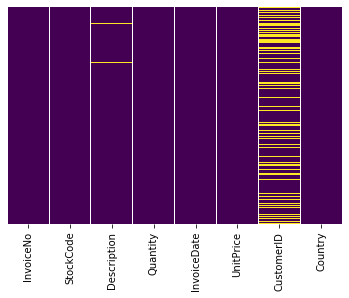

In [87]:
## TO check Missing values (YELLOW lines are missing values)
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')
## Major issue : we have missing for Custmer ID and description (should be resolved)

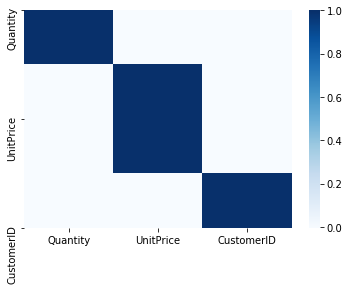

In [6]:
# To check correlation
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),cmap='Blues',annot=False)

In [7]:
### AGGREGATION (we remove uneccesary columns in the raw data)
df.drop(['StockCode'],axis = 1, inplace = True)     ## We'll description to find patterns    
df.drop(['Quantity'],axis = 1, inplace = True)      ## for SPADE algo the quanity is not considered, but paatern
df.drop(['InvoiceNo'],axis = 1, inplace = True)     ## We'll use INVOICE_DATE to order them
df.drop(['UnitPrice'],axis = 1, inplace = True)     ## Not neccessary
df.drop(['Country'],axis = 1, inplace = True)       ## Not neccessary
df.head()

,Description,InvoiceDate,CustomerID
0,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,17850.0
1,WHITE METAL LANTERN,2010-12-01 08:26:00,17850.0
2,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,17850.0
3,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,17850.0
4,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,17850.0


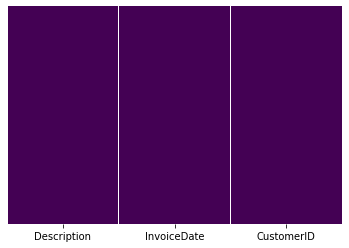

In [8]:
## Remove missing value, by droping rows which don't have Customer ID
df = df.dropna()
## Check for missing values
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

## WE HAVE NO MISSING VALUES

## WE HAVE NO MISSING VALUES

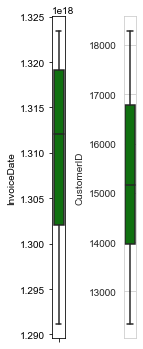

In [9]:
## Check for the outliers 
df2 = pd.DataFrame()
df2 = df.copy()
df2.drop(['Description'],axis = 1, inplace = True)
df2['CustomerID'] = df2['CustomerID'].astype('int64')
df2['InvoiceDate'] = df2['InvoiceDate'].astype('int64')
l = df2.columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df2[l[i]],color='green',orient='v')
    plt.tight_layout()
    
## WE HAVE NO OUTLIERS

## WE HAVE NO OUTLIERS

In [10]:
## We create Event_ID(EID) based on time data from InvoiceDate
df['InvoiceDate'] = df['InvoiceDate'].astype('category')  #Change time to category type
df["EID"] = df["InvoiceDate"].cat.codes                   #Copy those categories into EID column
df.drop(['InvoiceDate'],axis = 1, inplace = True)         #Drop InvoiceDate, no use from now on
df = df.reset_index(drop=True)                            #resetting index
df.head(20)

,Description,CustomerID,EID
0,WHITE HANGING HEART T-LIGHT HOLDER,17850.0,0
1,WHITE METAL LANTERN,17850.0,0
2,CREAM CUPID HEARTS COAT HANGER,17850.0,0
3,KNITTED UNION FLAG HOT WATER BOTTLE,17850.0,0
4,RED WOOLLY HOTTIE WHITE HEART.,17850.0,0
5,SET 7 BABUSHKA NESTING BOXES,17850.0,0
6,GLASS STAR FROSTED T-LIGHT HOLDER,17850.0,0
7,HAND WARMER UNION JACK,17850.0,1
8,HAND WARMER RED POLKA DOT,17850.0,1
9,ASSORTED COLOUR BIRD ORNAMENT,13047.0,2


In [11]:
## We create Sequence_ID(SID) based on the CustomerID
df['CustomerID'] = df['CustomerID'].astype('category')    #Change CustomerID to category
df["SID"] = df["CustomerID"].cat.codes                    #Copy those categories into EID column
df.drop(['CustomerID'],axis = 1, inplace = True)          #Drop InvoiceDate, no use from now on
df.head(20)

,Description,EID,SID
0,WHITE HANGING HEART T-LIGHT HOLDER,0,4048
1,WHITE METAL LANTERN,0,4048
2,CREAM CUPID HEARTS COAT HANGER,0,4048
3,KNITTED UNION FLAG HOT WATER BOTTLE,0,4048
4,RED WOOLLY HOTTIE WHITE HEART.,0,4048
5,SET 7 BABUSHKA NESTING BOXES,0,4048
6,GLASS STAR FROSTED T-LIGHT HOLDER,0,4048
7,HAND WARMER UNION JACK,1,4048
8,HAND WARMER RED POLKA DOT,1,4048
9,ASSORTED COLOUR BIRD ORNAMENT,2,540


In [12]:
sid = df["SID"].nunique()
eid = df["EID"].nunique()
item = df["Description"].nunique()
df=df.rename(columns={'Description': 'Item_set'}) #Renaming Description to Item_set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 3 columns):
Item_set    406829 non-null object
EID         406829 non-null int16
SID         406829 non-null int16
dtypes: int16(2), object(1)
memory usage: 4.7+ MB


In [13]:
## Number of Sequence_ID compared to 406829 total values
sid

4372

In [14]:
## Number of Event_ID compared to 406829 total values
eid

20460

In [ ]:
# Number of items compared to 406829 total values
item

## End of Preprocessing

In [16]:
df['Item_set'] = df['Item_set'].astype('category')      #Change time to category
df["Item"] = df["Item_set"].cat.codes                   #Copy those categories into EID column
item_set = pd.DataFrame()
item_set = df.copy()

In [17]:
## SAVE Item_set data-frame for future use
item_set.drop(['EID'],axis = 1, inplace = True)
item_set.drop(['SID'],axis = 1, inplace = True)
item_set.head()

,Item_set,Item
0,WHITE HANGING HEART T-LIGHT HOLDER,3716
1,WHITE METAL LANTERN,3724
2,CREAM CUPID HEARTS COAT HANGER,861
3,KNITTED UNION FLAG HOT WATER BOTTLE,1813
4,RED WOOLLY HOTTIE WHITE HEART.,2776


In [18]:
item_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 2 columns):
Item_set    406829 non-null category
Item        406829 non-null int16
dtypes: category(1), int16(1)
memory usage: 1.7 MB


In [19]:
df.drop(['Item_set'],axis = 1, inplace = True)       #Droping item_set

In [20]:
df.head(20)

## NOTE : The items are renamed into numbers for convience

,EID,SID,Item
0,0,4048,3716
1,0,4048,3724
2,0,4048,861
3,0,4048,1813
4,0,4048,2776
5,0,4048,2977
6,0,4048,1444
7,1,4048,1562
8,1,4048,1559
9,2,540,217


# Finding 1-length frequent items(F-1) ::

In [21]:
## now lets START with the algorithm , the dataset df is already in Vertical data format
#lets check the items whose support >= min_support (assuming 10% )
df2 = pd.DataFrame()
df2 = df.copy()
y = 0
new = pd.DataFrame()
### LOOP for EACH ITEM
for x in range(0, item):
    if(x==y):
        test = pd.DataFrame()
        test = df2.loc[df2['Item'] == x]
        test = test.reset_index(drop=True)
        sid_count = test["SID"].nunique()
        supp = sid_count/sid
        print(supp)
        if(supp>=0.17):
            new = new.append(test, ignore_index = True)
        y=y+1
    
        

0.007090576395242452
0.0242451967063129
0.023101555352241537
0.013266239707227814
0.00022872827081427266
0.006633119853613907
0.009377859103385178
0.018755718206770355
0.029963403476669717
0.02516010978956999
0.00022872827081427266
0.00960658737419945
0.0409423604757548
0.02401646843549863
0.010521500457456541
0.008920402561756633
0.0016010978956999085
0.012808783165599268
0.0343092406221409
0.04391582799634035
0.05283623055809698
0.04460201280878317
0.030878316559926806
0.04231473010064044
0.036139066788655076
0.035910338517840805
0.0029734675205855443
0.003888380603842635
0.010750228728270814
0.0016010978956999085
0.039569990850869166
0.00022872827081427266
0.010064043915827997
0.0052607502287282705
0.00022872827081427266
0.004117108874656907
0.003888380603842635
0.0034309240622140895
0.030878316559926806
0.006404391582799634
0.02058554437328454
0.0004574565416285453
0.0006861848124428179
0.029734675205855442
0.013266239707227814
0.0459743824336688
0.015324794144556267
0.039569990850

0.0006861848124428179
0.00022872827081427266
0.0006861848124428179
0.002516010978956999
0.004803293687099725
0.0192131747483989
0.00022872827081427266
0.0027447392497712718
0.0034309240622140895
0.0016010978956999085
0.004117108874656907
0.018298261665141813
0.00777676120768527
0.0013723696248856359
0.0004574565416285453
0.0006861848124428179
0.009149130832570906
0.0018298261665141812
0.017840805123513267
0.0011436413540713633
0.0018298261665141812
0.002516010978956999
0.003202195791399817
0.0006861848124428179
0.0242451967063129
0.0006861848124428179
0.0020585544373284536
0.0020585544373284536
0.0013723696248856359
0.04117108874656908
0.0022872827081427266
0.006404391582799634
0.017612076852698992
0.0011436413540713633
0.013266239707227814
0.013723696248856358
0.00022872827081427266
0.0004574565416285453
0.0020585544373284536
0.0013723696248856359
0.007090576395242452
0.00022872827081427266
0.0020585544373284536
0.02859103385178408
0.00022872827081427266
0.0013723696248856359
0.002516

0.032479414455626715
0.00022872827081427266
0.00022872827081427266
0.0004574565416285453
0.0006861848124428179
0.004574565416285453
0.0011436413540713633
0.0006861848124428179
0.0006861848124428179
0.030649588289112534
0.0018298261665141812
0.02264409881061299
0.0016010978956999085
0.0626715462031107
0.006861848124428179
0.010978956999085087
0.028133577310155537
0.004803293687099725
0.0004574565416285453
0.06655992680695334
0.00022872827081427266
0.00022872827081427266
0.0011436413540713633
0.02767612076852699
0.0006861848124428179
0.00022872827081427266
0.00022872827081427266
0.00022872827081427266
0.0034309240622140895
0.0006861848124428179
0.00022872827081427266
0.00022872827081427266
0.0004574565416285453
0.0016010978956999085
0.0013723696248856359
0.0011436413540713633
0.0013723696248856359
0.0016010978956999085
0.0009149130832570906
0.0004574565416285453
0.0034309240622140895
0.0016010978956999085
0.0036596523330283625
0.0034309240622140895
0.006861848124428179
0.0169258920402561

0.019441903019213176
0.015324794144556267
0.012808783165599268
0.0006861848124428179
0.0011436413540713633
0.0004574565416285453
0.0004574565416285453
0.0004574565416285453
0.010064043915827997
0.006861848124428179
0.006404391582799634
0.006633119853613907
0.01212259835315645
0.005032021957913998
0.0016010978956999085
0.003202195791399817
0.0054894784995425435
0.0016010978956999085
0.0004574565416285453
0.00777676120768527
0.005032021957913998
0.018526989935956084
0.0267612076852699
0.0006861848124428179
0.026303751143641353
0.00022872827081427266
0.024931381518755718
0.007548032936870997
0.031793229643183894
0.004803293687099725
0.03339432753888381
0.002516010978956999
0.008005489478499543
0.0036596523330283625
0.02859103385178408
0.01120768526989936
0.013952424519670631
0.013494967978042087
0.013494967978042087
0.012351326623970723
0.013952424519670631
0.01029277218664227
0.011893870082342177
0.012351326623970723
0.009377859103385178
0.009149130832570906
0.010521500457456541
0.000914

0.010064043915827997
0.014409881061299177
0.0057182067703568165
0.0009149130832570906
0.00022872827081427266
0.0009149130832570906
0.0052607502287282705
0.007548032936870997
0.024702653247941447
0.04734675205855444
0.0409423604757548
0.01898444647758463
0.00777676120768527
0.008920402561756633
0.0016010978956999085
0.00022872827081427266
0.0011436413540713633
0.011436413540713633
0.00022872827081427266
0.03774016468435499
0.04139981701738335
0.12305580969807868
0.1312900274473925
0.00022872827081427266
0.008462946020128087
0.007319304666056725
0.0027447392497712718
0.0018298261665141812
0.002516010978956999
0.028362305580969808
0.03705397987191217
0.00022872827081427266
0.0004574565416285453
0.016239707227813358
0.012351326623970723
0.021271729185727357
0.011665141811527904
0.017840805123513267
0.03705397987191217
0.05123513266239707
0.002516010978956999
0.003202195791399817
0.015324794144556267
0.06999085086916743
0.08943275388838061
0.09057639524245197
0.07868252516010979
0.017154620

0.006633119853613907
0.00022872827081427266
0.0004574565416285453
0.0006861848124428179
0.0004574565416285453
0.02058554437328454
0.06312900274473925
0.006861848124428179
0.006861848124428179
0.014409881061299177
0.05032021957913998
0.13494967978042086
0.04826166514181153
0.0020585544373284536
0.0006861848124428179
0.0027447392497712718
0.0027447392497712718
0.00022872827081427266
0.00022872827081427266
0.00022872827081427266
0.00022872827081427266
0.0004574565416285453
0.0006861848124428179
0.0018298261665141812
0.003888380603842635
0.00022872827081427266
0.0004574565416285453
0.0004574565416285453
0.0006861848124428179
0.0034309240622140895
0.0036596523330283625
0.027904849039341262
0.04734675205855444
0.01212259835315645
0.021500457456541628
0.022186642268984445
0.0022872827081427266
0.00434583714547118
0.003202195791399817
0.0022872827081427266
0.0029734675205855443
0.0027447392497712718
0.0022872827081427266
0.003202195791399817
0.002516010978956999
0.0029734675205855443
0.0025160

0.0020585544373284536
0.0011436413540713633
0.0011436413540713633
0.004574565416285453
0.0034309240622140895
0.0009149130832570906
0.0016010978956999085
0.004803293687099725
0.0009149130832570906
0.012808783165599268
0.011893870082342177
0.04528819762122598
0.024702653247941447
0.0006861848124428179
0.0006861848124428179
0.00022872827081427266
0.0018298261665141812
0.0009149130832570906
0.0009149130832570906
0.0036596523330283625
0.0013723696248856359
0.0029734675205855443
0.0027447392497712718
0.0004574565416285453
0.0054894784995425435
0.00022872827081427266
0.0004574565416285453
0.0016010978956999085
0.010521500457456541
0.040027447392497716
0.016010978956999086
0.0022872827081427266
0.06999085086916743
0.06473010064043916
0.07753888380603842
0.06724611161939616
0.07227813357731015
0.08051235132662397
0.021271729185727357
0.03751143641354071
0.06495882891125343
0.0004574565416285453
0.017840805123513267
0.08257090576395243
0.010064043915827997
0.005946935041171089
0.0004574565416285

0.006633119853613907
0.014867337602927721
0.0006861848124428179
0.01738334858188472
0.018298261665141813
0.02241537053979872
0.00022872827081427266
0.0192131747483989
0.0020585544373284536
0.0020585544373284536
0.0020585544373284536
0.0013723696248856359
0.00869167429094236
0.028133577310155537
0.013723696248856358
0.046889295516925895
0.03705397987191217
0.04460201280878317
0.043000914913083256
0.0016010978956999085
0.020128087831655993
0.018526989935956084
0.06198536139066789
0.023559011893870083
0.07387923147301007
0.020356816102470265
0.004117108874656907
0.05718206770356816
0.0016010978956999085
0.0013723696248856359
0.015324794144556267
0.0034309240622140895
0.0004574565416285453
0.008462946020128087
0.006175663311985362
0.007319304666056725
0.0057182067703568165
0.01555352241537054
0.014409881061299177
0.021957913998170174
0.016925892040256175
0.013723696248856358
0.014409881061299177
0.03728270814272644
0.003202195791399817
0.017840805123513267
0.011436413540713633
0.0235590118

0.0006861848124428179
0.0011436413540713633
0.0029734675205855443
0.0011436413540713633
0.009377859103385178
0.0011436413540713633
0.0013723696248856359
0.0020585544373284536
0.008920402561756633
0.0004574565416285453
0.00022872827081427266
0.018755718206770355
0.02516010978956999
0.012580054894784995
0.0020585544373284536
0.008462946020128087
0.012351326623970723
0.021729185727355903
0.039341262580054895
0.03202195791399817
0.01029277218664227
0.014409881061299177
0.01212259835315645
0.0018298261665141812
0.016239707227813358
0.02241537053979872
0.014181152790484904
0.030649588289112534
0.02607502287282708
0.005032021957913998
0.04666056724611162
0.08371454711802379
0.052378774016468434
0.04460201280878317
0.046431838975297346
0.05375114364135407
0.06061299176578225
0.03476669716376944
0.0016010978956999085
0.0016010978956999085
0.020128087831655993
0.02401646843549863
0.049862763037511436
0.016697163769441904
0.013952424519670631
0.020356816102470265
0.019441903019213176
0.0205855443

In [22]:
item_list = new['Item'].nunique()
item_list

2

In [24]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3975 entries, 0 to 3974
Data columns (total 3 columns):
EID     3975 non-null int16
SID     3975 non-null int16
Item    3975 non-null int16
dtypes: int16(3)
memory usage: 23.4 KB


In [25]:
item_set = item_set.drop_duplicates(subset=None, keep='first', inplace=False)
item_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3896 entries, 0 to 406349
Data columns (total 2 columns):
Item_set    3896 non-null category
Item        3896 non-null int16
dtypes: category(1), int16(1)
memory usage: 236.1 KB


In [26]:
## now we merge these to get item_set 'real-name' instead of 'number'
new = new.merge(item_set, on='Item')
new.head()

,EID,SID,Item,Item_set
0,48,2860,2780,REGENCY CAKESTAND 3 TIER
1,51,3107,2780,REGENCY CAKESTAND 3 TIER
2,59,1287,2780,REGENCY CAKESTAND 3 TIER
3,62,2351,2780,REGENCY CAKESTAND 3 TIER
4,64,4094,2780,REGENCY CAKESTAND 3 TIER


In [27]:
## puttung item names in braket's { '()' } for convience
new = new.drop(['Item'],axis = 1) 
new['Item_set'] = new['Item_set'].astype(str)
new['Item_set']  = '('+new['Item_set'] +')'
new.head()

,EID,SID,Item_set
0,48,2860,(REGENCY CAKESTAND 3 TIER)
1,51,3107,(REGENCY CAKESTAND 3 TIER)
2,59,1287,(REGENCY CAKESTAND 3 TIER)
3,62,2351,(REGENCY CAKESTAND 3 TIER)
4,64,4094,(REGENCY CAKESTAND 3 TIER)


In [30]:
### 1-length FREQUENT items::
item_list = new['Item_set'].unique()
print('The F1 items are ::')
print(item_list)

The F1 items are ::
['(REGENCY CAKESTAND 3 TIER)' '(WHITE HANGING HEART T-LIGHT HOLDER)']


# Creating Vertical Database from F-1 items

In [31]:
######### CREATING VERTICAL DATA FORMAT (<itemset>,(EID,SID,ITEM)) #####################
vertical_database = {} 

for num in item_list:
    vertical_database[num] = new.loc[new['Item_set'] == num]
    vertical_database[num] = vertical_database[num].reset_index(drop=True)

for key in vertical_database.keys():
    print("\n" +"="*40)
    print(key)
    print("-"*40)
    print(vertical_database[key])


(REGENCY CAKESTAND 3 TIER)
----------------------------------------
        EID   SID                    Item_set
0        48  2860  (REGENCY CAKESTAND 3 TIER)
1        51  3107  (REGENCY CAKESTAND 3 TIER)
2        59  1287  (REGENCY CAKESTAND 3 TIER)
3        62  2351  (REGENCY CAKESTAND 3 TIER)
4        64  4094  (REGENCY CAKESTAND 3 TIER)
...     ...   ...                         ...
1900  20380  1813  (REGENCY CAKESTAND 3 TIER)
1901  20395   330  (REGENCY CAKESTAND 3 TIER)
1902  20395   330  (REGENCY CAKESTAND 3 TIER)
1903  20416  2555  (REGENCY CAKESTAND 3 TIER)
1904  20435  1268  (REGENCY CAKESTAND 3 TIER)

[1905 rows x 3 columns]

(WHITE HANGING HEART T-LIGHT HOLDER)
----------------------------------------
        EID   SID                              Item_set
0         0  4048  (WHITE HANGING HEART T-LIGHT HOLDER)
1         7  4048  (WHITE HANGING HEART T-LIGHT HOLDER)
2         9  4048  (WHITE HANGING HEART T-LIGHT HOLDER)
3        21  3801  (WHITE HANGING HEART T-LIGHT HOL

In [32]:
sid = new['SID'].unique()
sid

array([2860, 3107, 1287, ...,  634, 2312, 3358], dtype=int64)

In [33]:
## Dropping SID from 'test' df to make required DB
test = new.drop(['SID'],axis = 1)

In [34]:
## Rearrange cols of test df for convience
cols = test.columns.tolist()
cols = cols[-1:] + cols[:-1]
test = test[cols]  

# Convert Vertical to Horizontal Database :: 

In [35]:
## Since the id list is created now create a "HORIZONTAL DATABASE" for each sequence_id frequent items
## Horizontal_database :: <SID>,(EID,ITEM)
h_db ={}

for num in sid:
    h_db[num] = test.loc[new['SID'] == num]
    h_db[num] = h_db[num].reset_index(drop=True)

for key in h_db.keys():
    print("\n" +"="*40)
    print(key)
    print("-"*40)
    print(h_db[key])


2860
----------------------------------------
                               Item_set    EID
0            (REGENCY CAKESTAND 3 TIER)     48
1            (REGENCY CAKESTAND 3 TIER)  12153
2  (WHITE HANGING HEART T-LIGHT HOLDER)   2850
3  (WHITE HANGING HEART T-LIGHT HOLDER)   6748
4  (WHITE HANGING HEART T-LIGHT HOLDER)  17612
5  (WHITE HANGING HEART T-LIGHT HOLDER)  19543

3107
----------------------------------------
                               Item_set  EID
0            (REGENCY CAKESTAND 3 TIER)   51
1  (WHITE HANGING HEART T-LIGHT HOLDER)   51

1287
----------------------------------------
                     Item_set  EID
0  (REGENCY CAKESTAND 3 TIER)   59

2351
----------------------------------------
                     Item_set  EID
0  (REGENCY CAKESTAND 3 TIER)   62

4094
----------------------------------------
                     Item_set  EID
0  (REGENCY CAKESTAND 3 TIER)   64

2648
----------------------------------------
                     Item_set  EID
0  (REGEN

3  (WHITE HANGING HEART T-LIGHT HOLDER)  6446

3374
----------------------------------------
                     Item_set    EID
0  (REGENCY CAKESTAND 3 TIER)   2241
1  (REGENCY CAKESTAND 3 TIER)  11341

3155
----------------------------------------
                               Item_set    EID
0            (REGENCY CAKESTAND 3 TIER)   2266
1            (REGENCY CAKESTAND 3 TIER)   5077
2  (WHITE HANGING HEART T-LIGHT HOLDER)  17534

1548
----------------------------------------
                     Item_set   EID
0  (REGENCY CAKESTAND 3 TIER)  2269
1  (REGENCY CAKESTAND 3 TIER)  3132

1206
----------------------------------------
                     Item_set    EID
0  (REGENCY CAKESTAND 3 TIER)   2274
1  (REGENCY CAKESTAND 3 TIER)   8908
2  (REGENCY CAKESTAND 3 TIER)  15560
3  (REGENCY CAKESTAND 3 TIER)  16647
4  (REGENCY CAKESTAND 3 TIER)  18924

4338
----------------------------------------
                               Item_set   EID
0            (REGENCY CAKESTAND 3 TIER)  228

3  (WHITE HANGING HEART T-LIGHT HOLDER)  7445

109
----------------------------------------
                     Item_set    EID
0  (REGENCY CAKESTAND 3 TIER)   4621
1  (REGENCY CAKESTAND 3 TIER)  10856

3421
----------------------------------------
                     Item_set   EID
0  (REGENCY CAKESTAND 3 TIER)  4644

961
----------------------------------------
                     Item_set   EID
0  (REGENCY CAKESTAND 3 TIER)  4647
1  (REGENCY CAKESTAND 3 TIER)  7627
2  (REGENCY CAKESTAND 3 TIER)  9159

2481
----------------------------------------
                     Item_set   EID
0  (REGENCY CAKESTAND 3 TIER)  4678

3194
----------------------------------------
                     Item_set   EID
0  (REGENCY CAKESTAND 3 TIER)  4689

936
----------------------------------------
                     Item_set   EID
0  (REGENCY CAKESTAND 3 TIER)  4700
1  (REGENCY CAKESTAND 3 TIER)  7766

103
----------------------------------------
                     Item_set    EID
0  (REGENCY C

3  (WHITE HANGING HEART T-LIGHT HOLDER)  15557

533
----------------------------------------
                     Item_set   EID
0  (REGENCY CAKESTAND 3 TIER)  6822

1137
----------------------------------------
                     Item_set   EID
0  (REGENCY CAKESTAND 3 TIER)  6843

828
----------------------------------------
                     Item_set   EID
0  (REGENCY CAKESTAND 3 TIER)  6869

3816
----------------------------------------
                     Item_set   EID
0  (REGENCY CAKESTAND 3 TIER)  6882

1374
----------------------------------------
                     Item_set   EID
0  (REGENCY CAKESTAND 3 TIER)  6883

1966
----------------------------------------
                               Item_set    EID
0            (REGENCY CAKESTAND 3 TIER)   6886
1            (REGENCY CAKESTAND 3 TIER)  11323
2            (REGENCY CAKESTAND 3 TIER)  12156
3  (WHITE HANGING HEART T-LIGHT HOLDER)   6886
4  (WHITE HANGING HEART T-LIGHT HOLDER)   9679
5  (WHITE HANGING HEART T-LIGHT

6  (WHITE HANGING HEART T-LIGHT HOLDER)  19933

1476
----------------------------------------
                     Item_set    EID
0  (REGENCY CAKESTAND 3 TIER)  11504

3427
----------------------------------------
                     Item_set    EID
0  (REGENCY CAKESTAND 3 TIER)  11516
1  (REGENCY CAKESTAND 3 TIER)  13548
2  (REGENCY CAKESTAND 3 TIER)  13548
3  (REGENCY CAKESTAND 3 TIER)  14249

245
----------------------------------------
                     Item_set    EID
0  (REGENCY CAKESTAND 3 TIER)  11528

824
----------------------------------------
                     Item_set    EID
0  (REGENCY CAKESTAND 3 TIER)  11547

2019
----------------------------------------
                               Item_set    EID
0            (REGENCY CAKESTAND 3 TIER)  11623
1  (WHITE HANGING HEART T-LIGHT HOLDER)  11623

1936
----------------------------------------
                     Item_set    EID
0  (REGENCY CAKESTAND 3 TIER)  11629

2110
----------------------------------------
    

----------------------------------------
                     Item_set    EID
0  (REGENCY CAKESTAND 3 TIER)  16609

1036
----------------------------------------
                     Item_set    EID
0  (REGENCY CAKESTAND 3 TIER)  16615

2176
----------------------------------------
                     Item_set    EID
0  (REGENCY CAKESTAND 3 TIER)  16650

475
----------------------------------------
                     Item_set    EID
0  (REGENCY CAKESTAND 3 TIER)  16652

196
----------------------------------------
                     Item_set    EID
0  (REGENCY CAKESTAND 3 TIER)  16881

1133
----------------------------------------
                     Item_set    EID
0  (REGENCY CAKESTAND 3 TIER)  16937

3918
----------------------------------------
                     Item_set    EID
0  (REGENCY CAKESTAND 3 TIER)  16956
1  (REGENCY CAKESTAND 3 TIER)  20356

3907
----------------------------------------
                     Item_set    EID
0  (REGENCY CAKESTAND 3 TIER)  16968

42

----------------------------------------
                               Item_set  EID
0  (WHITE HANGING HEART T-LIGHT HOLDER)  961

3043
----------------------------------------
                                Item_set    EID
0   (WHITE HANGING HEART T-LIGHT HOLDER)   1049
1   (WHITE HANGING HEART T-LIGHT HOLDER)   3006
2   (WHITE HANGING HEART T-LIGHT HOLDER)   3847
3   (WHITE HANGING HEART T-LIGHT HOLDER)   5026
4   (WHITE HANGING HEART T-LIGHT HOLDER)   6237
5   (WHITE HANGING HEART T-LIGHT HOLDER)  11820
6   (WHITE HANGING HEART T-LIGHT HOLDER)  12734
7   (WHITE HANGING HEART T-LIGHT HOLDER)  13554
8   (WHITE HANGING HEART T-LIGHT HOLDER)  15939
9   (WHITE HANGING HEART T-LIGHT HOLDER)  19159
10  (WHITE HANGING HEART T-LIGHT HOLDER)  20210

20
----------------------------------------
                               Item_set    EID
0  (WHITE HANGING HEART T-LIGHT HOLDER)   1065
1  (WHITE HANGING HEART T-LIGHT HOLDER)  16083

3549
----------------------------------------
             

0  (WHITE HANGING HEART T-LIGHT HOLDER)  4600

1564
----------------------------------------
                               Item_set   EID
0  (WHITE HANGING HEART T-LIGHT HOLDER)  4636
1  (WHITE HANGING HEART T-LIGHT HOLDER)  7212
2  (WHITE HANGING HEART T-LIGHT HOLDER)  8691

2607
----------------------------------------
                               Item_set    EID
0  (WHITE HANGING HEART T-LIGHT HOLDER)   4676
1  (WHITE HANGING HEART T-LIGHT HOLDER)  11308
2  (WHITE HANGING HEART T-LIGHT HOLDER)  19272

1311
----------------------------------------
                               Item_set   EID
0  (WHITE HANGING HEART T-LIGHT HOLDER)  4684
1  (WHITE HANGING HEART T-LIGHT HOLDER)  6759

4104
----------------------------------------
                               Item_set    EID
0  (WHITE HANGING HEART T-LIGHT HOLDER)   4712
1  (WHITE HANGING HEART T-LIGHT HOLDER)  10648

3533
----------------------------------------
                               Item_set   EID
0  (WHITE HANGING HEAR


1534
----------------------------------------
                               Item_set    EID
0  (WHITE HANGING HEART T-LIGHT HOLDER)   9592
1  (WHITE HANGING HEART T-LIGHT HOLDER)  15923

1177
----------------------------------------
                               Item_set   EID
0  (WHITE HANGING HEART T-LIGHT HOLDER)  9663

2097
----------------------------------------
                               Item_set   EID
0  (WHITE HANGING HEART T-LIGHT HOLDER)  9719

1658
----------------------------------------
                               Item_set    EID
0  (WHITE HANGING HEART T-LIGHT HOLDER)   9789
1  (WHITE HANGING HEART T-LIGHT HOLDER)  10777
2  (WHITE HANGING HEART T-LIGHT HOLDER)  10777

1354
----------------------------------------
                               Item_set   EID
0  (WHITE HANGING HEART T-LIGHT HOLDER)  9807

1465
----------------------------------------
                               Item_set   EID
0  (WHITE HANGING HEART T-LIGHT HOLDER)  9904

3275
---------------

1  (WHITE HANGING HEART T-LIGHT HOLDER)  18747

920
----------------------------------------
                               Item_set    EID
0  (WHITE HANGING HEART T-LIGHT HOLDER)  18858

194
----------------------------------------
                               Item_set    EID
0  (WHITE HANGING HEART T-LIGHT HOLDER)  18902

2980
----------------------------------------
                               Item_set    EID
0  (WHITE HANGING HEART T-LIGHT HOLDER)  18911

1725
----------------------------------------
                               Item_set    EID
0  (WHITE HANGING HEART T-LIGHT HOLDER)  18993
1  (WHITE HANGING HEART T-LIGHT HOLDER)  18993

3359
----------------------------------------
                               Item_set    EID
0  (WHITE HANGING HEART T-LIGHT HOLDER)  19106

3994
----------------------------------------
                               Item_set    EID
0  (WHITE HANGING HEART T-LIGHT HOLDER)  19123

2504
----------------------------------------
               

# Finding F-2 Items :: 

In [40]:
new.head()

,EID,SID,Item_set
0,48,2860,(REGENCY CAKESTAND 3 TIER)
1,51,3107,(REGENCY CAKESTAND 3 TIER)
2,59,1287,(REGENCY CAKESTAND 3 TIER)
3,62,2351,(REGENCY CAKESTAND 3 TIER)
4,64,4094,(REGENCY CAKESTAND 3 TIER)


# Note that EID in 'new' df are sorted in ascending order

In [37]:
t = pd.DataFrame()

In [41]:
new = new.reset_index(drop=True)
sid = new['SID'].unique()
for sid in sid:                             ## for loop for each SID
    df = pd.DataFrame()
    df = new.loc[new['SID'] == sid]         ##creating df for each choosen SID
    for i in range(len(df.index)):          ## loop for each row of SID
        for j in range(i+1,len(df.index)):  ## loop for each row of SID
            temp = pd.DataFrame({'EID':[0], ## Creating temp dataframe to store values
                   'SID':[0], 
                   'Item_set':['Item_set']})
            temp = temp.reset_index(drop=True)
            temp.iloc[0,2] = df.iloc[i,2]+'-->'+df.iloc[j,2] ## Storing values of Item_set
            temp.iloc[0,0] = df.iloc[j,0]                    ## Storing the value of higher EID ( since ascending order)
            temp.iloc[0,1] = df.iloc[j,1]                    ## Storing value of SID
            t = t.append(temp,ignore_index = True)           ## Append the values of each row created

## Please give it time not more than 1 min it has to go through 4000 rows  

In [42]:
t = t.reset_index(drop=True)
t.head()

,EID,SID,Item_set
0,12153,2860,(REGENCY CAKESTAND 3 TIER)-->(REGENCY CAKESTAN...
1,2850,2860,(REGENCY CAKESTAND 3 TIER)-->(WHITE HANGING HE...
2,6748,2860,(REGENCY CAKESTAND 3 TIER)-->(WHITE HANGING HE...
3,17612,2860,(REGENCY CAKESTAND 3 TIER)-->(WHITE HANGING HE...
4,19543,2860,(REGENCY CAKESTAND 3 TIER)-->(WHITE HANGING HE...


In [43]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27102 entries, 0 to 27101
Data columns (total 3 columns):
EID         27102 non-null int64
SID         27102 non-null int64
Item_set    27102 non-null object
dtypes: int64(2), object(1)
memory usage: 635.3+ KB


In [44]:
item_list = t['Item_set'].unique()
sid = t['SID'].nunique()

In [45]:
## now lets START with the algorithm , the dataset df is already in Vertical data format
#lets check the items whose support >= min_support (assuming 17% )
df2 = pd.DataFrame()
df2 = t.copy()
y = 0
F2 = pd.DataFrame()
### LOOP for EACH ITEM
for x in item_list:
    test = pd.DataFrame()
    test = df2.loc[df2['Item_set'] == x]
    test = test.reset_index(drop=True)
    sid_count = test["SID"].nunique()
    supp = sid_count/sid
    print(supp)
    if(supp>=0.17):
        F2 = F2.append(test, ignore_index = True)

0.48099606815203144
0.34338138925294887
0.564875491480996


In [47]:
F2_item= F2['Item_set'].unique()
print(F2_item)

['(REGENCY CAKESTAND 3 TIER)-->(REGENCY CAKESTAND 3 TIER)'
 '(REGENCY CAKESTAND 3 TIER)-->(WHITE HANGING HEART T-LIGHT HOLDER)'
 '(WHITE HANGING HEART T-LIGHT HOLDER)-->(WHITE HANGING HEART T-LIGHT HOLDER)']


# Note : We stop here due to the limitations mentioned in report and ppt